# Probability of detection

In [5]:
# Modules needed for this
from random import randint
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [6]:
NUM_EQUIV_VOLUMES = 1000  # number of locations in which to place civilizations
MAX_CIVS = 5000  # maximum number of advanced civilizations
TRIALS = 1000  # number of times to model a given number of civilization
CIV_STEP_SIZE = 100  # civilizations count step size 

In [7]:
x = []  # x values for polynomial fit
y = []  # y values for polynomial fit

In [10]:
for num_civs in range(2, MAX_CIVS + 2, CIV_STEP_SIZE):
    civs_per_vol = num_civs/NUM_EQUIV_VOLUMES
    num_single_civs = 0
    for trial in range(TRIALS):
        locations = []  # equivalent volumes containing a civilzation
        while len(locations) < num_civs:
            location = randint(1, NUM_EQUIV_VOLUMES)
            locations.append(location)
        overlap_count = Counter(locations)
        overlap_rollup = Counter(overlap_count.values())
        num_single_civs += overlap_rollup[1]
    
    prob = 1 - (num_single_civs/(num_civs*TRIALS))
    # print ratio of civs per volume vs. probability of 2+ civs per location
    # print(f'{civs_per_vol:.4f}  {prob:.4f}')
    x.append(civs_per_vol)
    y.append(prob)


           4          3          2
-0.004756 x + 0.0668 x - 0.3604 x + 0.921 x + 0.008824


(0.0, 1.5)

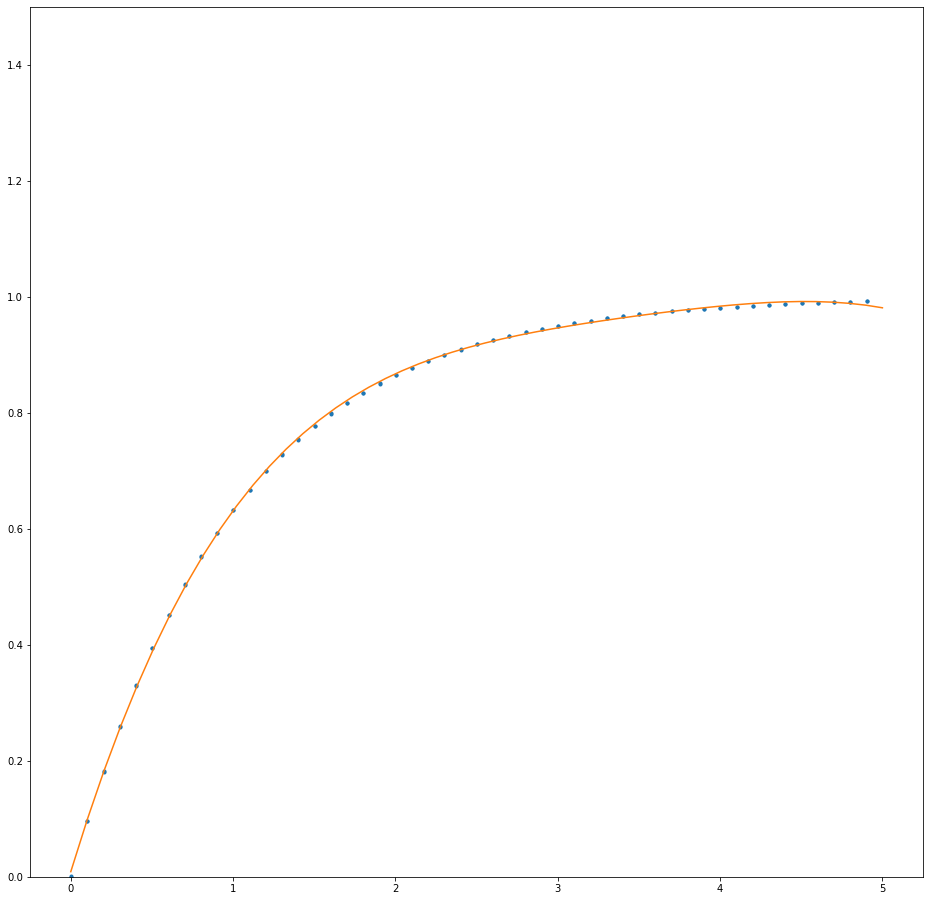

In [13]:
coefficients = np.polyfit(x, y, 4)  # 4th order polynomial fit
p = np.poly1d(coefficients)
print(f'\n{p}')
xp = np.linspace(0, 5)
plt.figure(figsize=(16,16))
plt.plot(x, y, '.', xp, p(xp), '-')
plt.ylim(0.0, 1.5)